# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Intan Fadhilah
- **Email:** m011b4kx1986@bangkit.academy
- **ID Dicoding:** m011b4kx1986

## Menentukan Pertanyaan Bisnis

- What was the trend in the number of bicycle users from January to December 2011?
- What is the difference in the trend of bicycle users between casual users and registered users throughout 2011?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
#Read Data
df = pd.read_csv("https://raw.githubusercontent.com/m011b4kx1986/project-bike/main/dashboard/all-data.csv", delimiter=",")

#Change the data type of 'dteday'
df['dteday'] = pd.to_datetime(df['dteday'])

#Using specific columns
df_column = df[['instant', 'dteday', 'mnth', 'casual', 'registered', 'cnt']]

#Using data from the year 2011
df_use = df_column[df_column['dteday'].dt.year == 2011]

#Displaying a portion of the data
print(df_use.head())

   instant     dteday  mnth  casual  registered   cnt
0        1 2011-01-01     1     331         654   985
1        2 2011-01-02     1     131         670   801
2        3 2011-01-03     1     120        1229  1349
3        4 2011-01-04     1     108        1454  1562
4        5 2011-01-05     1      82        1518  1600


**Insight:**
- The first analysis requires monthly data and the number of bike users for the year 2011.
- The second analysis requires monthly data on casual and registered bike users for the year 2011.

### Assessing Data

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     365 non-null    int64         
 1   dteday      365 non-null    datetime64[ns]
 2   mnth        365 non-null    int64         
 3   casual      365 non-null    int64         
 4   registered  365 non-null    int64         
 5   cnt         365 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 20.0 KB


In [ ]:
#Checking for Missing Values
df_use.isnull().sum()

,0
instant,0
dteday,0
mnth,0
casual,0
registered,0
cnt,0


In [ ]:
#Checking for Duplicate Data
print("Jumlah duplikasi:", df_use.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
#Checking for Outlier
data = df_use['cnt'].values
print(df_use['cnt'].describe())

#Calculating Quartile
q25, q75 = np.percentile(df_use['cnt'], [25, 75])
iqr = q75 - q25
cutoff = iqr * 1.5
minimum, maximum = q25 - cutoff, q75 + cutoff

outliers = [x for x in data if x < minimum or x > maximum]
print("Outliers:", outliers)
print("Jumlah Outliers:", len(outliers))

count     365.000000
mean     3405.761644
std      1378.753666
min       431.000000
25%      2132.000000
50%      3740.000000
75%      4586.000000
max      6043.000000
Name: cnt, dtype: float64
Outliers: []
Jumlah Outliers: 0


**Insight:**
- The process of identifying issues in the data to ensure data quality.
- The issues analyzed include Missing Values, Duplicate Data, and Outliers.
- The results of the analysis indicate that the data has no issues in these three parameters; no outliers were found because the minimum and maximum limits were not significant.

### Cleaning Data

**Insight:**
- No data cleaning was performed because the analysis results indicate that the data has no issues.

## Exploratory Data Analysis (EDA)

### Explore User

In [ ]:
#Viewing a summary of statistical parameters
df_use.describe(include="all")

,instant,dteday,mnth,casual,registered,cnt
count,365.000000,365,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2011-07-02 00:00:00,6.526027,677.402740,2728.358904,3405.761644
min,1.000000,2011-01-01 00:00:00,1.000000,9.000000,416.000000,431.000000
25%,92.000000,2011-04-02 00:00:00,4.000000,222.000000,1730.000000,2132.000000
50%,183.000000,2011-07-02 00:00:00,7.000000,614.000000,2915.000000,3740.000000
75%,274.000000,2011-10-01 00:00:00,10.000000,871.000000,3632.000000,4586.000000
max,365.000000,2011-12-31 00:00:00,12.000000,3065.000000,4614.000000,6043.000000
std,105.510663,NaN,3.452584,556.269121,1060.110413,1378.753666


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

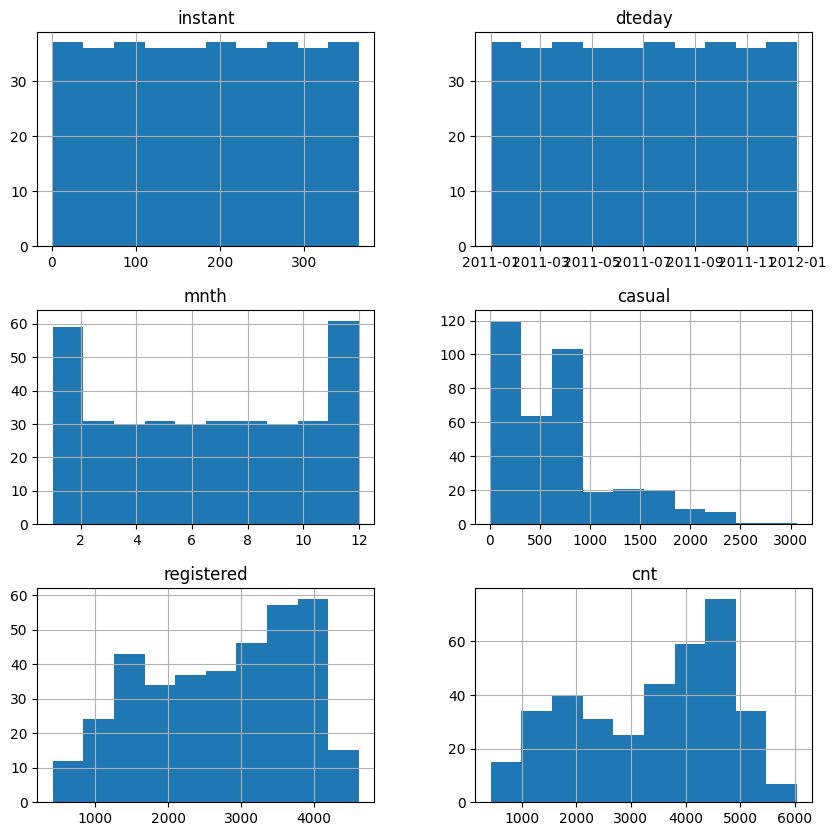

In [ ]:
#Checking the distribution of the data
df_use.hist(figsize=(10, 10))

In [ ]:
#Checking the correlation between numeric data
df_use.corr()

,instant,dteday,mnth,casual,registered,cnt
instant,1.000000,1.000000,0.996504,0.166029,0.484911,0.439829
dteday,1.000000,1.000000,0.996504,0.166029,0.484911,0.439829
mnth,0.996504,0.996504,1.000000,0.169797,0.489148,0.444607
casual,0.166029,0.166029,0.169797,1.000000,0.396547,0.708359
registered,0.484911,0.484911,0.489148,0.396547,1.000000,0.928880
cnt,0.439829,0.439829,0.444607,0.708359,0.928880,1.000000


**Insight:**
- Data exploration is conducted by reviewing a summary of statistical parameters, displaying histogram plots, and checking the correlation values among numeric data.
- Casual data exhibits a right-skewed distribution, while registered and count data show a left-skewed distribution; other data exhibit symmetric or zero skewed distributions.
- Some data have correlations close to one, while others are close to zero. The closer the correlation is to zero, the less correlation the data has.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64


<Axes: xlabel='mnth'>

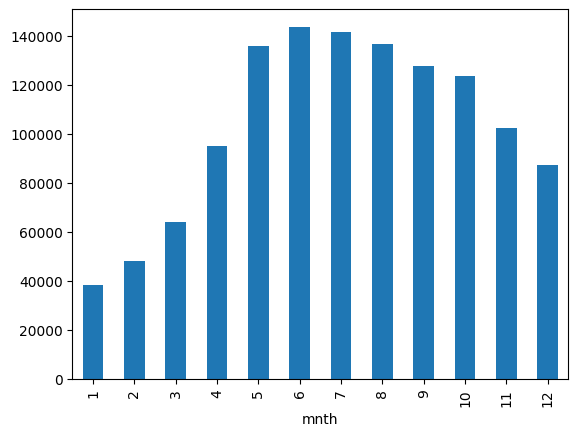

In [ ]:
#Data grouping
print(df_use.groupby(by='mnth')['cnt'].sum())

#Data visualization
df_use.groupby('mnth')['cnt'].sum().plot(kind='bar')

### Pertanyaan 2:

      casual  registered
mnth                    
1       3073       35116
2       6242       41973
3      12826       51219
4      22346       72524
5      31050      104771
6      30612      112900
7      36452      104889
8      28842      107849
9      26545      100873
10     25222       98289
11     15594       86573
12      8448       78875


<Axes: xlabel='mnth'>

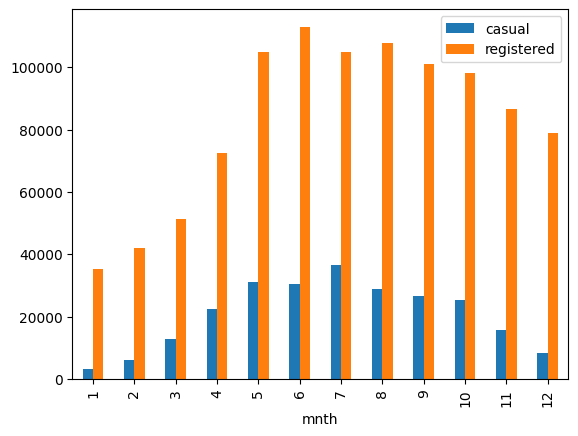

In [ ]:
#Data grouping
print(df_use.groupby(by='mnth')[['casual', 'registered']].sum())

#Data visualization
df_use.groupby('mnth')[['casual', 'registered']].sum().plot(kind='bar')

**Insight:**
- The visualizations for the two questions are displayed in bar plot graphs to observe the trend of bike usage each month throughout the year 2011

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- **Conclusion for Question 1:** The trend of bike usage throughout 2011 experienced both increases and decreases. The highest bike usage occurred in June, while the lowest was in January. Bike usage saw a significant rise between March-April and April-May.

- **Conclusion for Question 2:** Overall, the usage of registered bikes was significantly higher than that of casual bikes. Registered bike users experienced an increase until June, followed by a decline, while casual bike users saw an increase until May, then fluctuated until July before continuing to decline.